In [14]:
#import required libraries
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [15]:
#create data frame
df=pd.read_csv('201501-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [16]:
#understand the data content
print df.describe()

        tripduration  start station id  start station latitude  \
count  285552.000000     285552.000000           285552.000000   
mean      654.325583        443.535006               40.735804   
std       900.775928        332.580265                0.018773   
min        60.000000         72.000000               40.680342   
25%       334.000000        308.000000               40.723627   
50%       504.000000        417.000000               40.738274   
75%       772.000000        492.000000               40.750450   
max     43023.000000       3002.000000               40.771522   

       start station longitude  end station id  end station latitude  \
count            285552.000000   285552.000000         285552.000000   
mean                -73.990177      440.337557             40.735607   
std                   0.011681      326.010259              0.018718   
min                 -74.017134       72.000000             40.680342   
25%                 -73.998102      307.00000

In [17]:
#create dataframe for Male and Female ages 
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

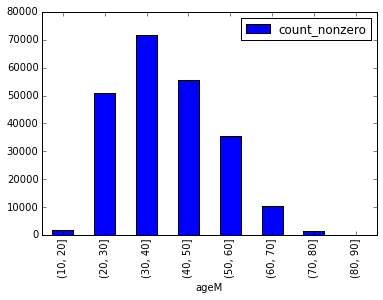

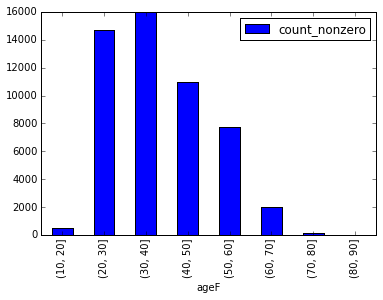

In [18]:
#put these dataframe in a range/bins 10 to 99 age with a 10 age interval and plot
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.001656
(20, 30]       0.060938
(30, 40]       0.052105
(40, 50]       0.018598
(50, 60]       0.010887
(60, 70]       0.003129
(70, 80]       0.000113
(80, 90]       0.000000


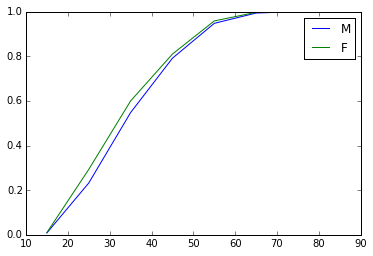

In [19]:
#create a cumulative distribution
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

#KS Test

In [20]:
import scipy.stats

In [21]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)

In [22]:
print ks

(0.61519793242561782, 0.0)


P-value is equal to 0 and it means that two sample do not come from the same parent distribution. Our test result is 0.61519793242561782 and this value smaller than the table value c(alpha) at 0.05 alpha value 1,36. As a result we reject the null hypothesis.

#Pearson Test

In [23]:
scipy.stats.pearsonr(df.ageM, df.ageF)

(nan, 1.0)

I get the pearson test value as Nan. Actually coefficient correlation should be between -1 and 1. So the value of the covariance is irrelevant. In the calculation process, pearson uses in the ratio part multiplicatio of the two std of the Male and Female age. One of them may be "0" for getting the result nan.


#Spearman's test

In [24]:
scipy.stats.spearmanr(df.ageM, df.ageF, axis=0)

(-0.43552302983795976, 0.0)

"Spearman correlation does not assume that both datasets are normally distributed". It is the power of the spearman's test and value : -0,435... indicates that these two distribution are negatively correlated and when one group age increases other group age decreases as coefficient value: -0,435... O is the p-value and it indicates that "he p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets." Additionlly, p-value is regarded as when the sample size bigger than the 500 so it can be regarded as meaningful.

In [25]:
#import reuqired libraries
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
from datetime import datetime

import os

#create a dataframe for starttime and hour
df['starttime'] = pd.to_datetime(df['starttime'])
df['hour'] = df['starttime'].dt.hour


Populating the interactive namespace from numpy and matplotlib


In [26]:
#create night and day age distriburtion. Night riders are defined as hour between 19-08. Day riders are defined as bewtween 08-19
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['hour'] > 19) | (df['hour'] < 8 )]
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ((df['hour'] <= 19) & (df['hour'] >= 8 ))]

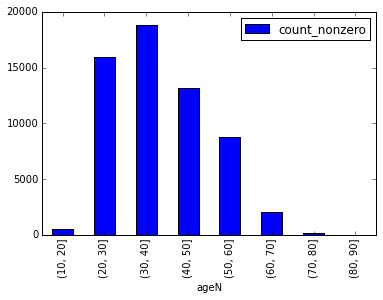

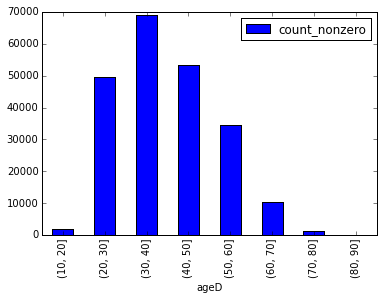

In [27]:
bins = np.arange(10, 99, 10)
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageD                   
(10, 20]       0.001198
(20, 30]       0.043246
(30, 40]       0.045248
(40, 50]       0.024675
(50, 60]       0.015570
(60, 70]       0.003157
(70, 80]       0.000051
(80, 90]       0.000000


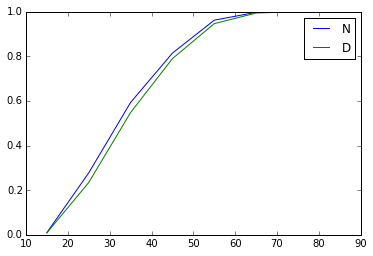

In [28]:
#create a cumulative distribution

csN=df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

csD=df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()

print np.abs(csD / csD.max()-csN / csN.max())

pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N")
pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D")
pl.legend()

#KS Test

In [29]:
ks=scipy.stats.ks_2samp(df.ageN, df.ageD)

In [30]:
print ks

(0.56210427522832973, 0.0)


P-value is equal to 0 and it means that two sample do not come from the same parent distribution. Our test result is 0.5874.... and this value smaller than the table value c(alpha) at 0.05 alpha value 1,36. As a result we reject the null hypothesis

#KS-2 Test

In [31]:
ks2=scipy.stats.ks_2samp(df.ageN, df.ageD)

print ks2 

(0.56210427522832973, 0.0)


In KS Test the distribution accepted as continously distributed. On the contrary,  KS-2 test uses the  This test uses "the two-sided asymptotic Kolmogorov-Smirnov distribution".  We reject the null hypothesis that the two distribution are not same.

#Pearson's Test

In [32]:
ageD_arr = df.ageD
ageN_arr = df.ageN


ageD_arr = ageD_arr[~numpy.isnan(ageD_arr)]
ageN_arr = ageN_arr[~numpy.isnan(ageN_arr)]

ageD_arr = np.random.choice(ageD_arr,20000, replace=False)
ageN_arr = np.random.choice(ageN_arr,20000, replace=False)

print ageD_arr
print ageN_arr

[ 46.  24.  17. ...,  31.  20.  63.]
[ 31.  41.  50. ...,  26.  44.  34.]


In [33]:
scipy.stats.pearsonr (ageD_arr, ageN_arr)

(-0.010377903439017224, 0.14221155856098341)

Test result shows us that these two distribuiton are nearly uncorrelated because correlation coefficient nearly 0. P-vaue is 1 indicates that "probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. "

In [34]:
scipy.stats.spearmanr(ageD_arr, ageN_arr, axis=0)

(-0.0091163481529369858, 0.19733116282170973)

It is the power of the spearman's test and value : 0,00331... indicates that these two distribution are nearly correlated. O,6 value is the p-value and it indicates that "he p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets." 